In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/vivianesilviana/vivianesilviana/main/hasil_roughset.csv", sep=",")
df.head()

,Unnamed: 0,sex,cp,trtbps,chol,restecg,output
0,0,1,3,145,233,0,1
1,1,1,2,130,250,1,1
2,2,0,1,130,204,0,1
3,3,1,1,120,236,1,1
4,4,0,0,120,354,1,1


In [ ]:
from sklearn import preprocessing;   
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('output',axis='columns'))
scaled_y = sy.fit_transform(df['output'].values.reshape(df.shape[0],1))

scaled_X

array([[0.        , 1.        , 1.        , 0.48113208, 0.24429224,
        0.        ],
       [0.00331126, 1.        , 0.66666667, 0.33962264, 0.28310502,
        0.5       ],
       [0.00662252, 0.        , 0.33333333, 0.33962264, 0.17808219,
        0.        ],
       ...,
       [0.99337748, 1.        , 0.        , 0.47169811, 0.15296804,
        0.5       ],
       [0.99668874, 1.        , 0.        , 0.33962264, 0.01141553,
        0.5       ],
       [1.        , 0.        , 0.33333333, 0.33962264, 0.25114155,
        0.        ]])

In [ ]:
scaled_y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
scaled_y_reshape=scaled_y.reshape(scaled_y.shape[0],)
scaled_y_reshape

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
def mini_batch_gradient_descent(X, y, iterasi, batch_size = 5, learning_rate = 0.01):

    jumlah_variabel = X.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly = np.ones(shape=(jumlah_variabel))       # b1, b2, ... b(jumlah variabel)
    b0 = 0                                         # b0 atau bias
    n = X.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X_smntr = X[random_indices]
        y_smntr = y[random_indices]
        
        for j in range(0, n, batch_size):
            Xj = X_smntr[j:j+batch_size]
            yj = y_smntr[j:j+batch_size]
            
            y_pred = np.dot(bpoly, Xj.T) + b0           # Menghitung y_pred pada setiap iterasi
        
            bpoly_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_grad = -(2/len(Xj))*np.sum(yj-y_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly = bpoly - learning_rate * bpoly_grad        # Memperbaharui bpoly setiap iterasi
            b0 = b0 - learning_rate * b0_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv in range(jumlah_variabel):
                bp1=bpoly[jv]
                bp.append(bp1)
            b=[b0]+bp
        
            cost = np.mean(np.square(yj-y_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_list.append(cost)                     # Menyimpan nilai cost setiap iterasi
            iterasi_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_list.append(b)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly, b0, cost, b_list, cost_list, iterasi_list  # Ouput

In [ ]:
import time
mulai = time.time()
mb_bpoly, mb_b0, mb_cost, mb_b_list, mb_cost_list, mb_iterasi_list=mini_batch_gradient_descent(scaled_X, 
                                                                                               scaled_y_reshape,
                                                                                               iterasi=10000, 
                                                                                               batch_size = 5, 
                                                                                               learning_rate = 0.01)
selesai = time.time()
waktu_komputasi = (selesai - mulai)
print("Waktu Komputasi: ",waktu_komputasi)

Waktu Komputasi:  30.448086738586426


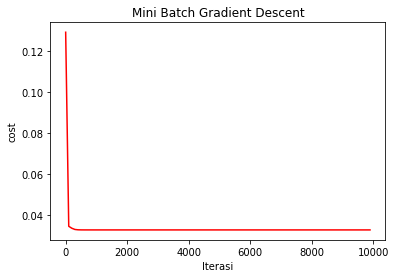

In [ ]:
plt.xlabel("Iterasi")
plt.ylabel("cost")
plt.title("Mini Batch Gradient Descent")
plt.plot(mb_iterasi_list,mb_cost_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost

0.03293638866111286